In [1]:
#import data manipulation libraries
import pandas as pd
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import filter warning libraries
import warnings
warnings.filterwarnings('ignore')

#Import loggings
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log', force = True)

#Import Sci-kit Learn Libraries for model building
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #overfit,outlier,imbalance data-robust(imblearn)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Import Dataset using pandas function
df = pd.read_csv('./Dataset/Churn_Data.csv')
df.sample(frac = 1) 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
777,778,15628936,Archer,692,Spain,Male,28.0,9,118945.09,1,0.0,0.0,16064.25,1
3065,3066,15614827,Sun,503,France,Male,42.0,8,104430.08,1,1.0,1.0,147557.71,0
9769,9770,15703707,Atkins,656,France,Male,44.0,10,143571.52,1,0.0,0.0,127444.14,0
4461,4462,15701809,Cavill,749,Spain,Female,28.0,3,0.00,1,1.0,0.0,3408.70,0
694,695,15681068,Chinagorom,796,France,Female,45.0,2,109730.22,1,1.0,1.0,123882.73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6647,6648,15691627,Tai,713,France,Female,37.0,8,0.00,1,1.0,1.0,16403.41,0
7888,7889,15683657,Stephenson,594,France,Female,31.0,0,79340.95,1,1.0,0.0,78255.86,0
3245,3246,15768151,Romano,514,Germany,Female,45.0,3,109032.23,1,0.0,1.0,155407.21,1
6804,6805,15787884,Martin,692,France,Female,30.0,7,0.00,2,1.0,1.0,18826.34,0


In [3]:
#Dataset information
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


<Axes: >

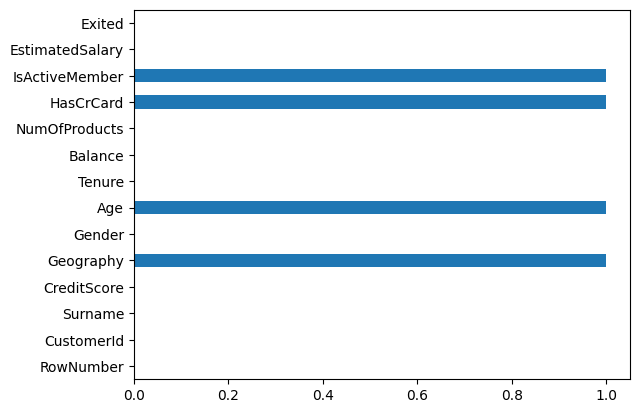

In [4]:
#Checking Null Values stats using Graphical method
df.isnull().sum().plot(kind = 'barh')

In [5]:
df['IsActiveMember'].fillna(df['IsActiveMember'].median(),inplace=True)

In [6]:
df['HasCrCard'].fillna(df['HasCrCard'].median(),inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True) #numerical impute with mean
df['Geography'].fillna('France',inplace=True) #object impute with mode

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#Evaluate Descriptive stats: EDA

# Step 1: Sagregate Categorical columns nd Numerical
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(include = ['int64','float64']) #or exclude = 'object'

In [9]:


# Exploratory Data Analysis
# Univariate Analysis

stats = []

from collections import OrderedDict

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feauture' : i,
        'Count' : df[i].count(),
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        'Mode' : df[i].mode()[0],
        'Minimum' : df[i].min(),
        'Maximum' : df[i].max(),
        'Q1' : df[i].quantile(0.25),
        'Q3' : df[i].quantile(0.75),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25), #IQR cannot be 0
        'Std' : df[i].std(),
        'skewness' : df[i].skew(), #positive skewness (right skew), negative skewness (left skew), and zero skewness (symmetrical distribution, i.e. normal data)
        'kurtosis' : df[i].kurtosis(), # mesokurtic, leptokurtic, and platykurtic.
        'Variance' : df[i].var(), #spread of data
        'Standard Deviation' : df[i].std() # distance between mean and data point, under root variance
    })

    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report



,Feauture,Count,Mean,Median,Mode,Minimum,Maximum,Q1,Q3,IQR,Std,skewness,kurtosis,Variance,Standard Deviation
0,RowNumber,10002,5.001500e+03,5001.50,9999.00,1.00,10000.00,2501.25,7.501750e+03,5000.5000,2887.472338,-8.301804e-07,-1.200001,8.337497e+06,2887.472338
1,CustomerId,10002,1.569093e+07,15690732.00,15628319.00,15565701.00,15815690.00,15628524.75,1.575323e+07,124700.7500,71931.769345,1.379949e-03,-1.195972,5.174179e+09,71931.769345
2,CreditScore,10002,6.505551e+02,652.00,850.00,350.00,850.00,584.00,7.180000e+02,134.0000,96.661615,-7.187787e-02,-0.426340,9.343468e+03,96.661615
3,Age,10002,3.892212e+01,37.00,37.00,18.00,92.00,32.00,4.400000e+01,12.0000,10.486693,1.011392e+00,1.396161,1.099707e+02,10.486693
4,Tenure,10002,5.012498e+00,5.00,2.00,0.00,10.00,3.00,7.000000e+00,4.0000,2.891973,1.126740e-02,-1.165051,8.363507e+00,2.891973
5,Balance,10002,7.649111e+04,97198.54,0.00,0.00,250898.09,0.00,1.276478e+05,127647.8400,62393.474144,-1.412948e-01,-1.489231,3.892946e+09,62393.474144
6,NumOfProducts,10002,1.530194e+00,1.00,1.00,1.00,4.00,1.00,2.000000e+00,1.0000,0.581639,7.454846e-01,0.582777,3.383043e-01,0.581639
7,HasCrCard,10002,7.055589e-01,1.00,1.00,0.00,1.00,0.00,1.000000e+00,1.0000,0.455814,-9.021225e-01,-1.186412,2.077663e-01,0.455814
8,IsActiveMember,10002,5.149970e-01,1.00,1.00,0.00,1.00,0.00,1.000000e+00,1.0000,0.499800,-6.002401e-02,-1.996796,2.498001e-01,0.499800
9,EstimatedSalary,10002,1.000833e+05,100185.24,24924.92,11.58,199992.48,50983.75,1.493837e+05,98399.9025,57508.117802,2.320765e-03,-1.181446,3.307184e+09,57508.117802


In [10]:
df['Exited'].value_counts()

Exited
0    7964
1    2038
Name: count, dtype: int64

In [11]:
# Use label Encoding Technique
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in categorical_col.columns:
    df[i] = le.fit_transform(df[i])

In [ ]:
#Preventing Data Leakage

# Step 01: Split the dataset in X and y
# Where X: Independent Column and y: Dependent Column : Target column
X = df.drop(columns = ['RowNumber','CustomerId','Surname','Exited'],axis = 1) # drops inside X, but presnt in df
y = df['Exited']

In [ ]:

# Step 02: Using Train Test Split
#test_size lies between 0.20 to 0.35(20-30 is enough)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42) 

In [ ]:
# Step 03: Using Scaling Technique
sc = RobustScaler()

#Seen data
X_train = sc.fit_transform(X_train)

# Unseen Data
X_test = sc.transform(X_test)

In [ ]:

# Step 3:
# df['loan_status'].value_counts()
from imblearn.over_sampling import SMOTE,ADASYN,SMOTENC
# from imblearn.under_sampling import AllKNN,ClusterCentroids

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train) #we do sampling on training data
y_train.value_counts()


In [14]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for the Random Forest Classifier: ',accuracy_score(y_test,y_pred_RF))



The Model Accuracy for the Random Forest Classifier:  0.8467177607464179


In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier().fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

print('Model Accuracy for Gradient Boosting Classifier:',accuracy_score(y_test,y_pred_gbr))

Model Accuracy for Gradient Boosting Classifier: 0.8383872042652449


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit model
random_search.fit(X_train, y_train)

# Results
print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Prediction & Evaluation
# y_pred = random_search.predict(X_test)
# print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; tot